## Max Verstappen vs Lando Norris, Q
 Lap Comparison

req         WARNING 	DEFAULT CACHE ENABLED! (214.83 MB) C:\Users\Manuel Bryan Arsenio\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '81', '27', '14', '22', '16', '55', '23', '43', '11', '20', '31', '3', '18', '10', '77', 

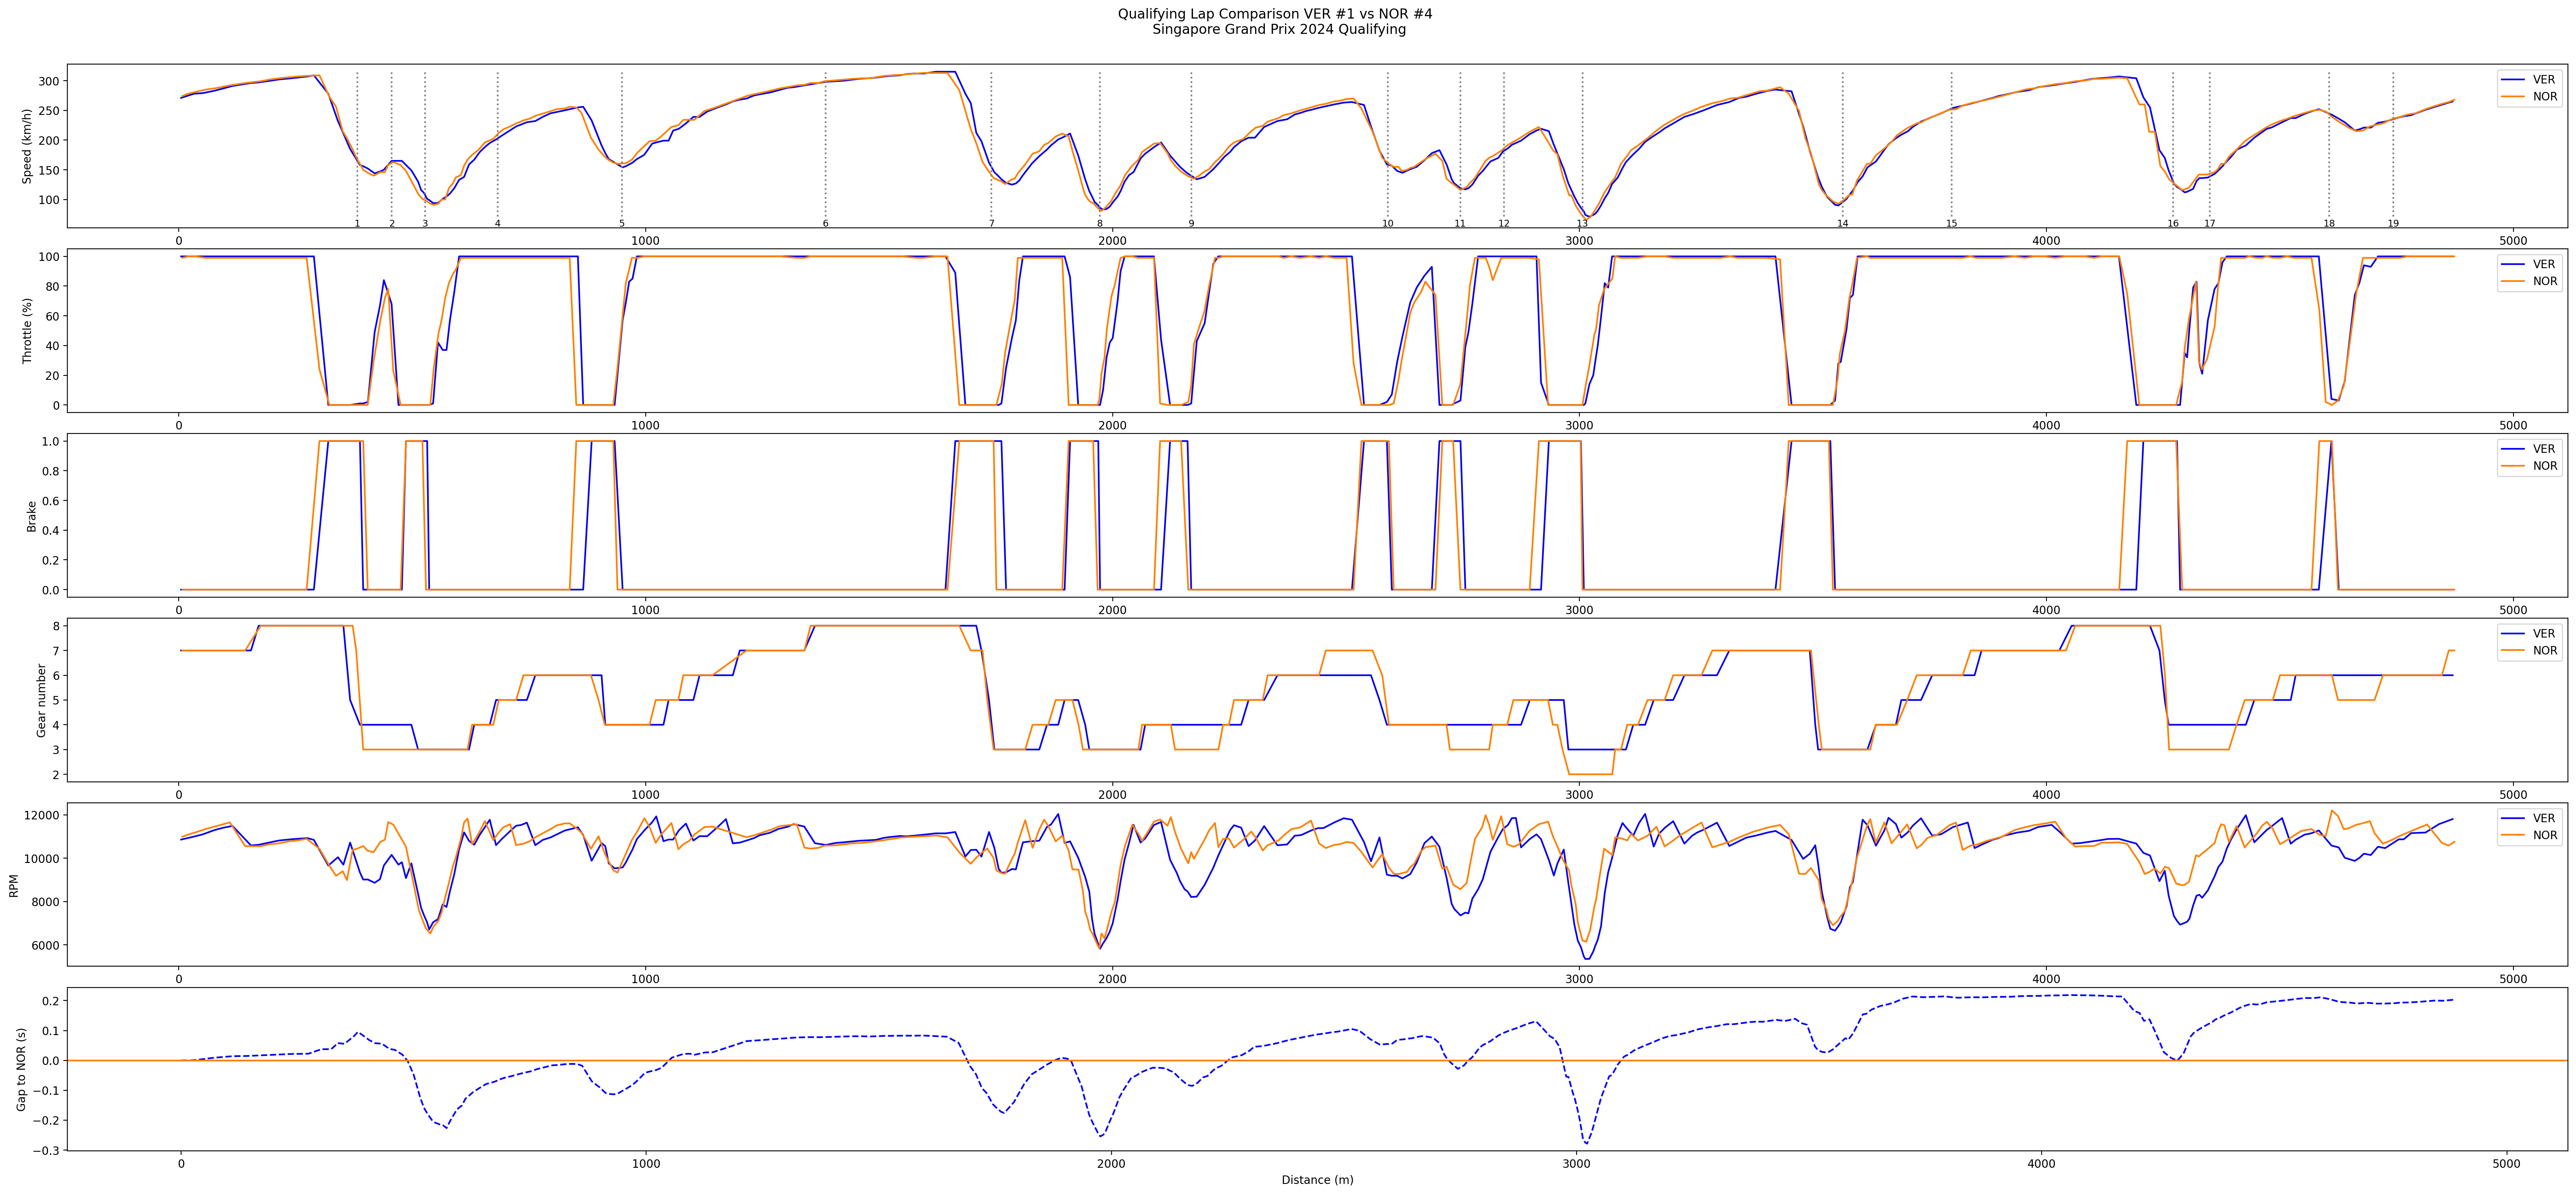

In [1]:
import matplotlib.pyplot as plt
import fastf1
from fastf1 import plotting
from fastf1 import utils

# Get qualifying session data
session = fastf1.get_session(2024,'Singapore', 'Q')
session.load()

# Split qualifying session to q1, q2 and q3
q1, q2, q3 = session.laps.split_qualifying_sessions()

# Obtain driver's fastest lap in q3
ver_lap = q3.pick_driver('VER').pick_fastest()  
nor_lap = q3.pick_driver('NOR').pick_fastest() 

# Obtain driver's distance covered in the fastest lap obtained
ver_tel = ver_lap.get_car_data().add_distance()
nor_tel = nor_lap.get_car_data().add_distance()

# color of line plotted
rbr_color = fastf1.plotting.get_team_color(ver_lap['Team'], session=session)
mcl_color = fastf1.plotting.get_team_color(nor_lap['Team'], session=session)

# PLotting 
fig, ax = plt.subplots(6, 1, figsize=(40, 17.5), dpi=200)

# Speed
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax[0].plot(nor_tel['Distance'], nor_tel['Speed'], color=mcl_color, label='NOR')

ax[0].set_ylabel('Speed (km/h)')

ax[0].legend()

# Creating corner annotations
circuit_info = session.get_circuit_info()

v_min_ver = ver_tel['Speed'].min()
v_max_ver = ver_tel['Speed'].max()
ax[0].vlines(x=circuit_info.corners['Distance'], ymin=v_min_ver, ymax=v_max_ver,
          linestyles='dotted', colors='grey')


for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax[0].text(corner['Distance'], v_min_ver-10, txt,
            va='center_baseline', ha='center', size='small')

# Throttle
ax[1].plot(ver_tel['Distance'], ver_tel['Throttle'], color=rbr_color, label='VER')
ax[1].plot(nor_tel['Distance'], nor_tel['Throttle'], color=mcl_color, label='NOR')

ax[1].set_ylabel('Throttle (%)')

ax[1].legend()

# Brake
ax[2].plot(ver_tel['Distance'], ver_tel['Brake'], color=rbr_color, label='VER')
ax[2].plot(nor_tel['Distance'], nor_tel['Brake'], color=mcl_color, label='NOR')

ax[2].set_ylabel('Brake')

ax[2].legend()

# Gear
ax[3].plot(ver_tel['Distance'], ver_tel['nGear'], color=rbr_color, label='VER')
ax[3].plot(nor_tel['Distance'], nor_tel['nGear'], color=mcl_color, label='NOR')

ax[3].set_ylabel('Gear number')

ax[3].legend()

# RPM
ax[4].plot(ver_tel['Distance'], ver_tel['RPM'], color=rbr_color, label='VER')
ax[4].plot(nor_tel['Distance'], nor_tel['RPM'], color=mcl_color, label='NOR')

ax[4].set_ylabel('RPM')

ax[4].legend()

# Delta
delta_time, ref_tel, compare_tel = utils.delta_time(nor_lap, ver_lap)

ax[5].plot(ref_tel['Distance'], delta_time, 'b--')
ax[5].axhline(0, color=mcl_color)

ax[5].set_ylabel("Gap to NOR (s)")
ax[5].set_xlabel('Distance (m)')

# Plot Title
plt.suptitle(f"Qualifying Lap Comparison VER #1 vs NOR #4 \n "
             f"{session.event['EventName']} {session.event.year} Qualifying",  y=0.92)

# Spacing between plots
plt.subplots_adjust(hspace=0.13)

# Showing plot
plt.show()